In [1]:
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/home/minhhieu/.local/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
conn = psycopg2.connect(database="VN30_Stocks", user="postgres", password="123", host="localhost", port="5432")
cur = conn.cursor()

In [3]:
query = """
    select *
    from data_fact
    order by date desc
    limit 30
"""
df = pd.read_sql_query(query, conn)

In [4]:
df

,symbol,date,close,volume,ma10,ma20,ma50,price_change_in_day,price_change_in_week,price_change_in_month,price_change_in_6month,price_change_in_year
0,VCB,2022-11-08,72600.0,165990.0,72227.3,69628.6,73962.8,1.11,-3.20,8.85,-6.80,-4.51
1,VRE,2022-11-08,25250.0,179840.0,24731.8,24669.1,26486.3,-0.98,-3.81,-2.88,-10.46,-18.15
2,POW,2022-11-08,10450.0,1085580.0,10160.0,10394.8,12057.7,6.74,0.97,-1.88,-19.31,-20.23
3,BID,2022-11-08,34900.0,307910.0,33409.1,32690.5,34191.2,4.80,2.50,19.52,1.31,0.45
4,VPB,2022-11-08,17200.0,2233540.0,16700.0,16283.3,17981.2,0.58,0.00,12.05,-18.87,-31.29
5,ACB,2022-11-08,21300.0,406590.0,21409.1,20819.1,21965.7,3.15,-5.12,14.21,-12.99,-20.52
6,GVR,2022-11-08,13050.0,117420.0,13809.1,14806.7,19641.2,4.82,-10.00,-21.39,-47.70,-67.46
7,VHM,2022-11-08,43800.0,552110.0,44463.6,47173.8,53022.6,-0.23,-2.67,-18.59,-33.71,-45.29
8,HPG,2022-11-08,13150.0,4627380.0,15536.4,16854.8,19943.1,-4.01,-12.33,-25.28,-56.51,-69.41
9,STB,2022-11-08,16450.0,2203470.0,16168.0,16526.1,19647.0,6.13,-2.66,-1.79,-30.74,-40.93


In [5]:
def insert_color(price:int):
    if price < 0:
        return "red"
    else:
        return "green"

# Evaluate the change of price in 1 day


In [6]:
price_change_in_day_df = df[["symbol", "price_change_in_day"]]
price_change_in_day_df = price_change_in_day_df.sort_values(by=["price_change_in_day"])
price_change_in_day_df = price_change_in_day_df.reset_index()
price_change_in_day_df["color"] = price_change_in_day_df["price_change_in_day"].map(insert_color)


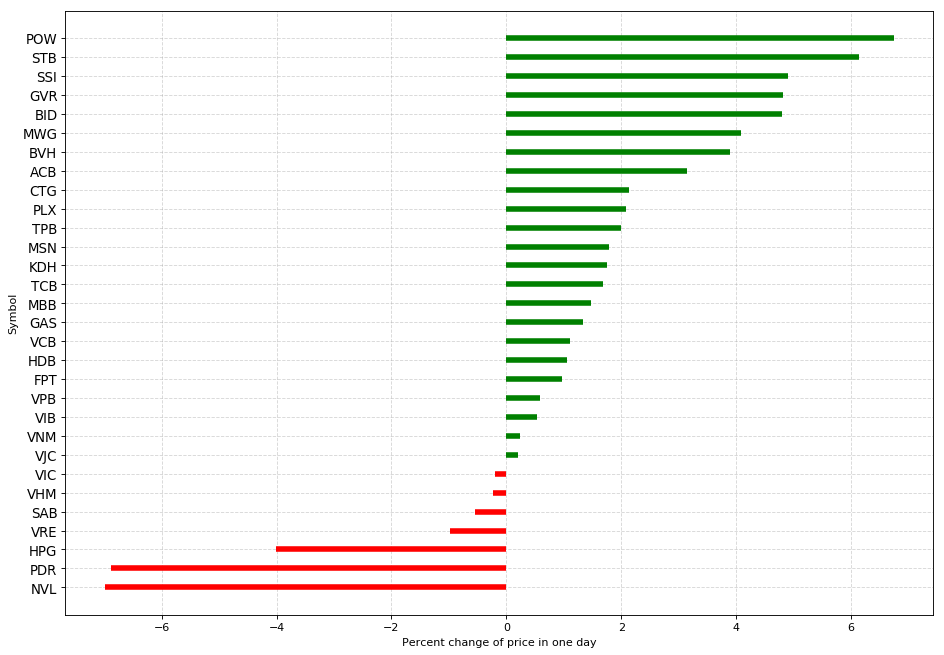

In [7]:
plt.figure(figsize=(14,10), dpi=80)
plt.hlines(y=price_change_in_day_df.index, xmin=0, xmax=price_change_in_day_df.price_change_in_day,color=price_change_in_day_df.color, linewidth=5)
plt.gca().set(ylabel="Symbol", xlabel="Percent change of price in one day")
plt.yticks(price_change_in_day_df.index, price_change_in_day_df.symbol, fontsize=12)
plt.grid(linestyle="--", alpha=0.5)

plt.show()

# Evaluate the change of price in 1 week

In [8]:
price_change_in_week_df = df[["symbol", "price_change_in_week"]]
price_change_in_week_df = price_change_in_week_df.sort_values(by=["price_change_in_week"])
price_change_in_week_df = price_change_in_week_df.reset_index()
price_change_in_week_df["color"] = price_change_in_week_df["price_change_in_week"].map(insert_color)


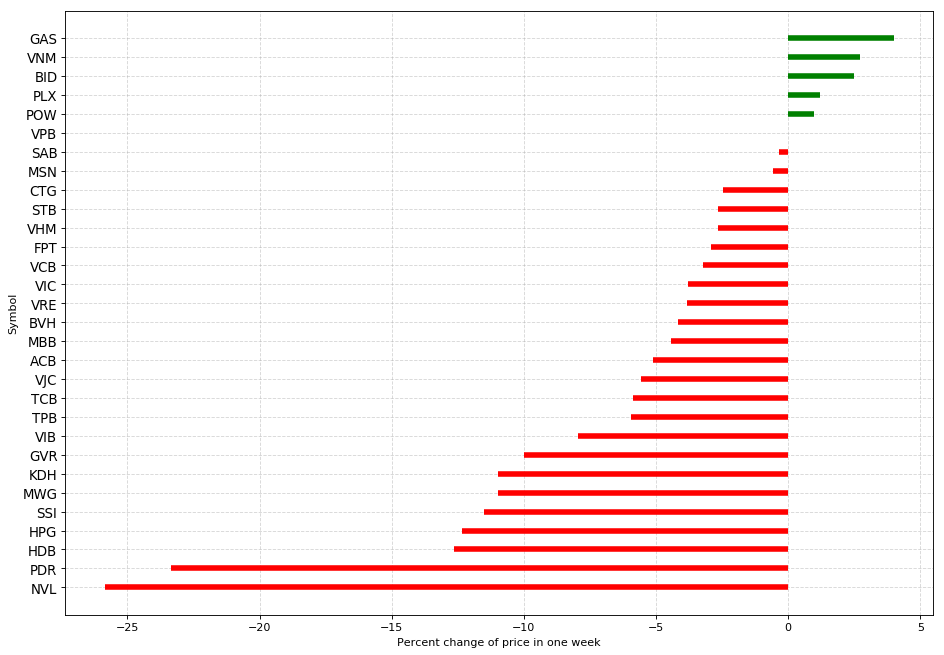

In [9]:
plt.figure(figsize=(14,10), dpi=80)
plt.hlines(y=price_change_in_week_df.index, xmin=0, xmax=price_change_in_week_df.price_change_in_week,color=price_change_in_week_df.color, linewidth=5)
plt.gca().set(ylabel="Symbol", xlabel="Percent change of price in one week")
plt.yticks(price_change_in_week_df.index, price_change_in_week_df.symbol, fontsize=12)
plt.grid(linestyle="--", alpha=0.5)

plt.show()

# Evaluate the change of price in 1 month

In [10]:
price_change_in_month_df = df[["symbol", "price_change_in_month"]]
price_change_in_month_df = price_change_in_month_df.sort_values(by=["price_change_in_month"])
price_change_in_month_df = price_change_in_month_df.reset_index()
price_change_in_month_df["color"] = price_change_in_month_df["price_change_in_month"].map(insert_color)

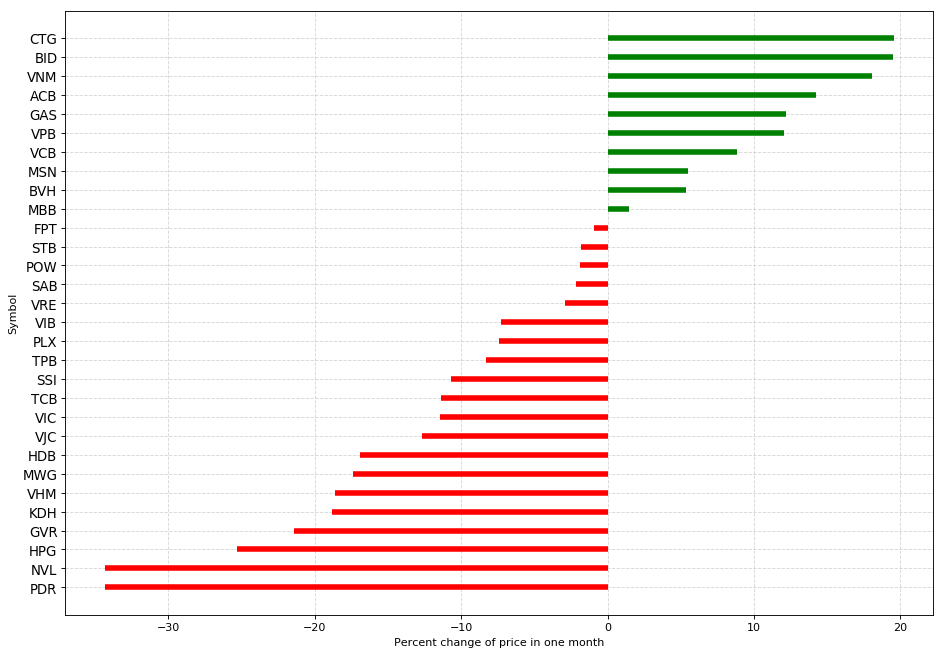

In [11]:
plt.figure(figsize=(14,10), dpi=80)
plt.hlines(y=price_change_in_month_df.index, xmin=0, xmax=price_change_in_month_df.price_change_in_month,color=price_change_in_month_df.color, linewidth=5)
plt.gca().set(ylabel="Symbol", xlabel="Percent change of price in one month")
plt.yticks(price_change_in_month_df.index, price_change_in_month_df.symbol, fontsize=12)
plt.grid(linestyle="--", alpha=0.5)

plt.show()

# Evaluate the change of price in 1 year

In [12]:
price_change_in_year_df = df[["symbol", "price_change_in_year"]]
price_change_in_year_df = price_change_in_year_df.sort_values(by=["price_change_in_year"])
price_change_in_year_df = price_change_in_year_df.reset_index()
price_change_in_year_df["color"] = price_change_in_year_df["price_change_in_year"].map(insert_color)

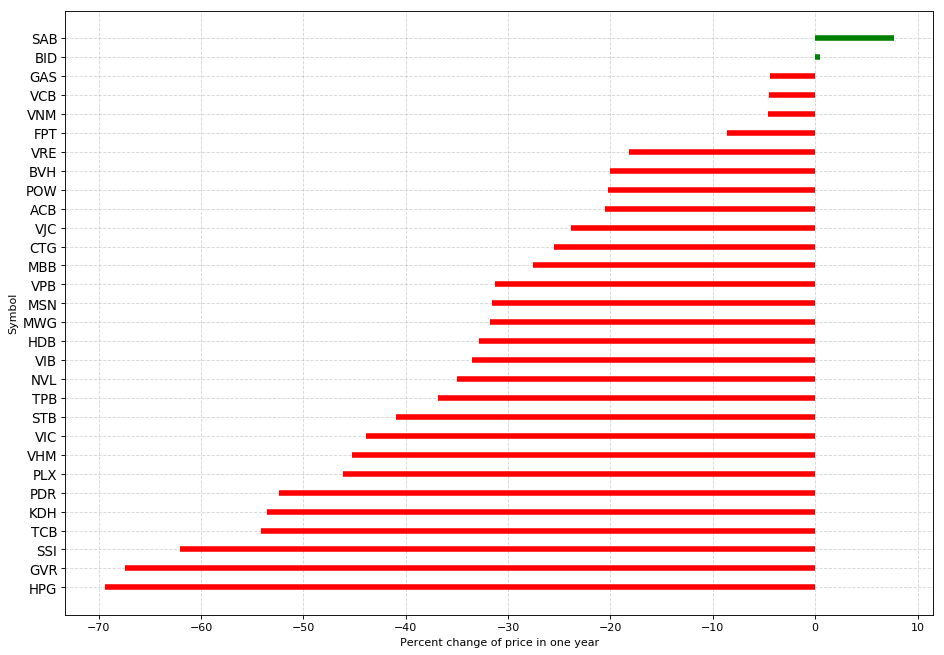

In [13]:
plt.figure(figsize=(14,10), dpi=80)
plt.hlines(y=price_change_in_year_df.index, xmin=0, xmax=price_change_in_year_df.price_change_in_year,color=price_change_in_year_df.color, linewidth=5)
plt.gca().set(ylabel="Symbol", xlabel="Percent change of price in one year")
plt.yticks(price_change_in_year_df.index, price_change_in_year_df.symbol, fontsize=12)
plt.grid(linestyle="--", alpha=0.5)

plt.show()

# Evaluate market trend in short term based on MA10 

In [14]:
query = """
    select *
    from data_fact
    order by date desc
    limit 300
"""
df2 = pd.read_sql_query(query, conn)

In [15]:
df_greater_ma10 = df2[df2["close"] >= df2["ma10"]].groupby("date").size().reset_index(name='greater')
df_lesser_ma10 = df2[df2["close"] < df2["ma10"]].groupby("date").size().reset_index(name='lesser')

In [16]:
df_ma10 = df_lesser_ma10.join(df_greater_ma10.set_index("date"), on="date")

In [17]:
df_ma10["lesser"] = df_ma10["lesser"]*(-1)

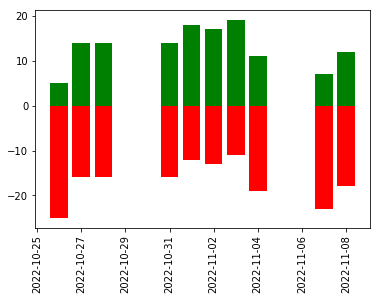

In [27]:
ax = plt.subplot()
ax.bar(df_ma10["date"], df_ma10["greater"], color="green")
ax.bar(df_ma10["date"], df_ma10["lesser"], color="red")
plt.xticks(rotation=90)
plt.show()

# Evaluate market trend in the medium term based on MA20 

In [19]:
df_greater_ma20 = df2[df2["close"] >= df2["ma20"]].groupby("date").size().reset_index(name='greater')
df_lesser_ma20 = df2[df2["close"] < df2["ma20"]].groupby("date").size().reset_index(name='lesser')

In [20]:
df_ma20 = df_lesser_ma20.join(df_greater_ma20.set_index("date"), on="date")

In [21]:
df_ma20["lesser"] = df_ma20["lesser"]*(-1)

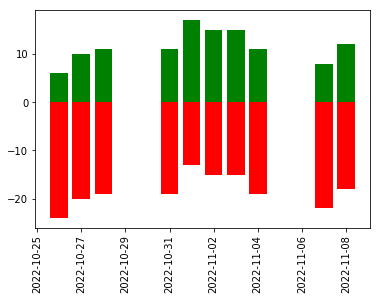

In [28]:
ax = plt.subplot()
ax.bar(df_ma20["date"], df_ma20["greater"], color="green")
ax.bar(df_ma20["date"], df_ma20["lesser"], color="red")
plt.xticks(rotation=90)
plt.show()

# Evaluate market trend in the long term based on MA50 

In [23]:
df_greater_ma50 = df2[df2["close"] >= df2["ma50"]].groupby("date").size().reset_index(name='greater')
df_lesser_ma50 = df2[df2["close"] < df2["ma50"]].groupby("date").size().reset_index(name='lesser')

In [24]:
df_ma50 = df_lesser_ma50.join(df_greater_ma50.set_index("date"), on="date")

In [25]:
df_ma50["lesser"] = df_ma50["lesser"]*(-1)

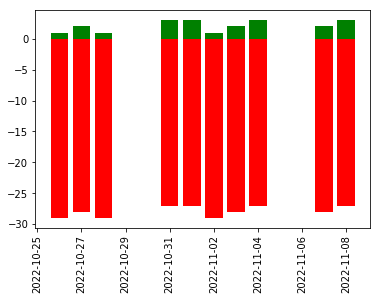

In [26]:
ax = plt.subplot()
ax.bar(df_ma50["date"], df_ma50["greater"], color="green")
ax.bar(df_ma50["date"], df_ma50["lesser"], color="red")
plt.xticks(rotation=90)
plt.show()